I've noticed some issues with the CIOPS-E catchup run during December 2019. This notebook documents the issue.

Mainly, there is some overlapping data from Dec 8, 2019 to Dec 11, 2019.

In [1]:
import datetime
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pytides.tide import Tide
from scipy import signal
import xarray as xr

%matplotlib inline

In [2]:
data_dir='/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/'

In [3]:
files_T=glob.glob(os.path.join(data_dir, '*_000', '*grid_T*'))
files_T.sort()
dt_2D = xr.open_mfdataset(files_T)

/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [4]:
restart_days = []
for f in files_T:
    d=os.path.basename(os.path.dirname(f))
    date=datetime.datetime.strptime(d.split('_')[0],'%Y%m%d%H')
    restart_days.append(date)
print(restart_days)

[datetime.datetime(2019, 5, 12, 0, 0), datetime.datetime(2019, 5, 19, 0, 0), datetime.datetime(2019, 5, 26, 0, 0), datetime.datetime(2019, 6, 2, 0, 0), datetime.datetime(2019, 6, 9, 0, 0), datetime.datetime(2019, 6, 16, 0, 0), datetime.datetime(2019, 6, 23, 0, 0), datetime.datetime(2019, 6, 30, 0, 0), datetime.datetime(2019, 7, 7, 0, 0), datetime.datetime(2019, 7, 14, 0, 0), datetime.datetime(2019, 7, 21, 0, 0), datetime.datetime(2019, 7, 28, 0, 0), datetime.datetime(2019, 8, 4, 0, 0), datetime.datetime(2019, 8, 11, 0, 0), datetime.datetime(2019, 8, 18, 0, 0), datetime.datetime(2019, 8, 25, 0, 0), datetime.datetime(2019, 9, 1, 0, 0), datetime.datetime(2019, 9, 8, 0, 0), datetime.datetime(2019, 9, 15, 0, 0), datetime.datetime(2019, 9, 22, 0, 0), datetime.datetime(2019, 9, 29, 0, 0), datetime.datetime(2019, 10, 6, 0, 0), datetime.datetime(2019, 10, 13, 0, 0), datetime.datetime(2019, 10, 20, 0, 0), datetime.datetime(2019, 10, 27, 0, 0), datetime.datetime(2019, 11, 3, 0, 0), datetime.datet

(1400, 850)
(800, 400)
(500, 600)
(100, 10)
(400, 750)


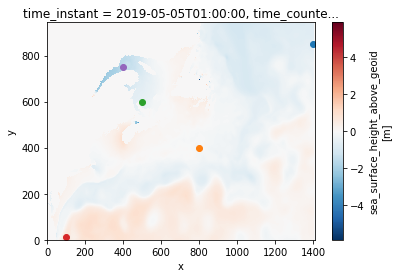

In [5]:
coords= [(1400, 850), (800,400), (500,600), (100,10), (400,750)]
n=len(coords)
colors=['C{}'.format(l) for l in range(n)]
fig,ax=plt.subplots(1,1)
dt_2D.zos.isel(time_counter=0).plot(ax=ax)
for c, color in zip(coords, colors):
    print(c)
    ax.plot(c[0], c[1],'o',color=color)

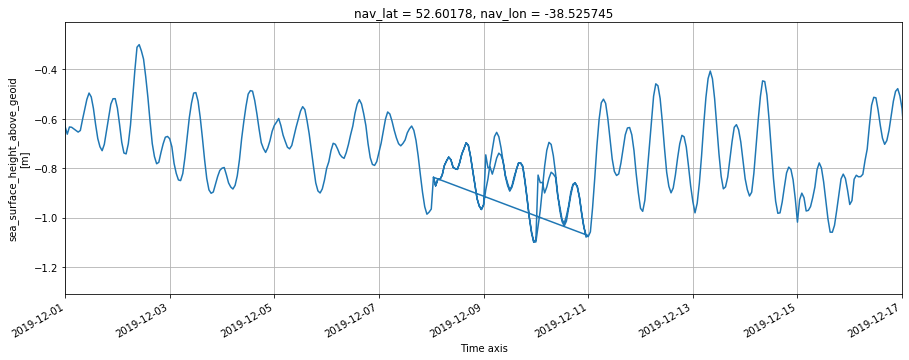

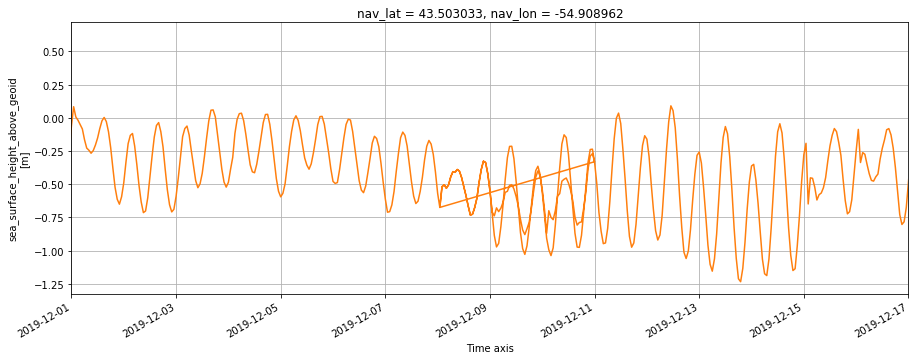

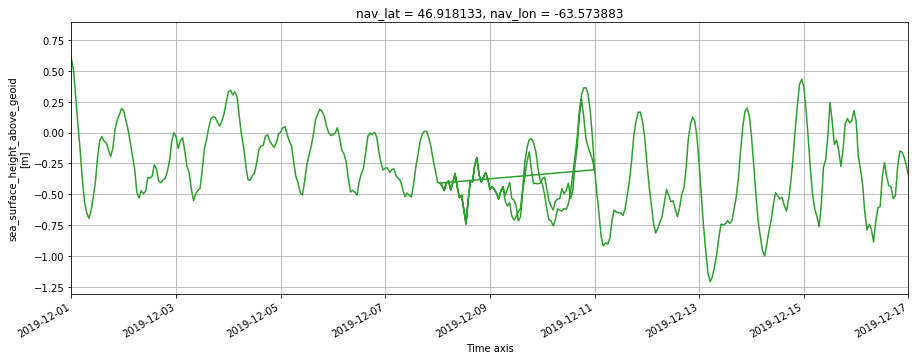

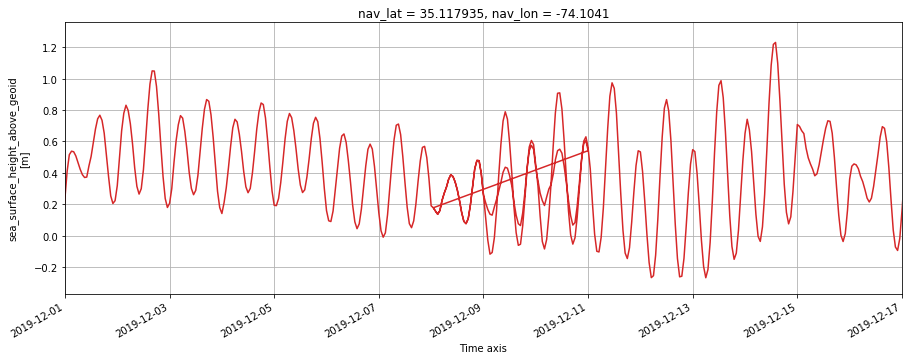

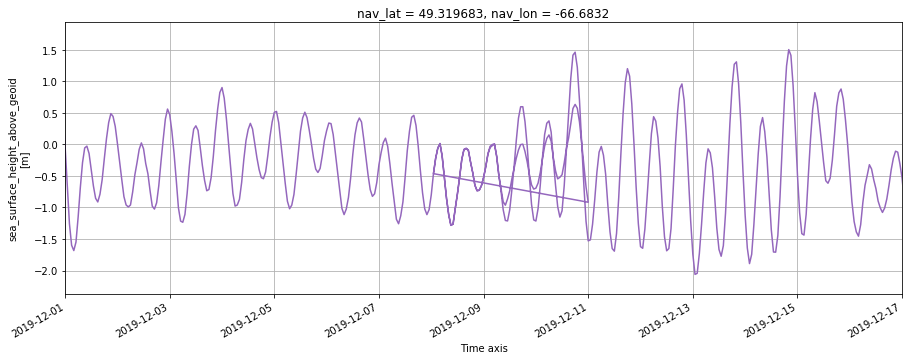

In [6]:
for c, color in zip(coords, colors):
    fig,ax=plt.subplots(1,1,figsize=(15,5))
    dt_2D.zos.isel(x=c[0],y=c[1]).plot(ax=ax, color=color)
    ax.set_xlim([datetime.datetime(2019,12,1), datetime.datetime(2019,12,17)])
    ax.grid()

There must have been a mistake in the restarts so that Dec 8 though 11 were repeated accidentally.

Let's look at the December files.

In [7]:
files_T_dec=glob.glob(os.path.join(data_dir, '201912*_000', '*grid_T*'))
files_T_dec.sort()

In [8]:
files_T_dec

['/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019120100_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019120800_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019120900_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019121000_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019121100_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019121500_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019121600_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019121700_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019121800_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchu

In [9]:
print(files_T_dec[1])
d1 = xr.open_dataset(files_T_dec[1])
d1

/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019120800_000/NEMO_RPN_1h_grid_T_2D.nc


<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time_counter: 168, x: 1410, y: 945)
Coordinates:
    nav_lat              (y, x) float32 ...
    nav_lon              (y, x) float32 ...
    time_instant         (time_counter) datetime64[ns] ...
  * time_counter         (time_counter) datetime64[ns] 2019-12-01T01:00:00 ... 2019-12-08
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    zos                  (time_counter, y, x) float32 ...
    ssh_ib               (time_counter, y, x) float32 ...
    ssh_tide             (time_counter, y, x) float32 ...
    tos                  (time_counter, y, x) float32 ...
    sos                  (time_counter, y, x) float32 ...
    mldkz5               (time_counter, y, x) float32 ...
    mldr10_1             (time_counter, y, x) float32 ...
    sbt                  (time_coun

In [10]:
print(files_T_dec[2:5])
d2 = xr.open_mfdataset(files_T_dec[2:5])
d2

['/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019120900_000/NEMO_RPN_1h_grid_T_2D.nc', '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019121000_000/NEMO_RPN_1h_grid_T_2D.nc', '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019121100_000/NEMO_RPN_1h_grid_T_2D.nc']


/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/home/soontiensn/miniconda/envs/tidal/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time_counter: 72, x: 1410, y: 945)
Coordinates:
    nav_lat              (y, x) float32 34.87753 34.87777 ... 54.302624
    nav_lon              (y, x) float32 -76.877075 -76.849304 ... -38.417286
    time_instant         (time_counter) datetime64[ns] dask.array<shape=(72,), chunksize=(24,)>
  * time_counter         (time_counter) datetime64[ns] 2019-12-08T01:00:00 ... 2019-12-11
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<shape=(72, 2), chunksize=(24, 2)>
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<shape=(72, 2), chunksize=(24, 2)>
    zos                  (time_counter, y, x) float32 dask.array<shape=(72, 945, 1410), chunksize=(24, 945, 1410)>
    ssh_ib               (time_counter, y, x) float32 dask.array<shape=(72, 945, 1410), chunksize=(24, 945, 1410)>
    ssh_tide             (time_c

In [11]:
print(files_T_dec[5])
d3 = xr.open_dataset(files_T_dec[5])
d3

/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019121500_000/NEMO_RPN_1h_grid_T_2D.nc


<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, time_counter: 168, x: 1410, y: 945)
Coordinates:
    nav_lat              (y, x) float32 ...
    nav_lon              (y, x) float32 ...
    time_instant         (time_counter) datetime64[ns] ...
  * time_counter         (time_counter) datetime64[ns] 2019-12-08T01:00:00 ... 2019-12-15
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    zos                  (time_counter, y, x) float32 ...
    ssh_ib               (time_counter, y, x) float32 ...
    ssh_tide             (time_counter, y, x) float32 ...
    tos                  (time_counter, y, x) float32 ...
    sos                  (time_counter, y, x) float32 ...
    mldkz5               (time_counter, y, x) float32 ...
    mldr10_1             (time_counter, y, x) float32 ...
    sbt                  (time_coun

Ok so the 20191209, 20191210, 20191211 files repeat the time period covered by the 20191215 file.

Not sure why... I would assume the 20191209, 20191210, 20191211 can be negelcted, otherwise the time series is incomplete. But that is my guess...

Suggestion: don't use December 2019 in any drift or analysis until confirmed with ECCC which files to use...

Exlcude 201912 files like so:

In [12]:
files_T_rem = [i for i in files_T if not ('201912' in i)]
files_T_rem

['/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019051200_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019051900_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019052600_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019060200_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019060900_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019061600_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019062300_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019063000_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchup/tests/2019070700_000/NEMO_RPN_1h_grid_T_2D.nc',
 '/home/soontiensn/data/gpsc-work2/CIOPSE_SN1500/catchu